# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

2025-06-22 18:48:30.391903: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-22 18:48:30.579340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750639710.683074    4804 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750639710.712734    4804 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-22 18:48:30.901169: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Description

In [3]:
print('Train shape:', train_images.shape)
print('Test shape:', test_images.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [6]:
test_labels.shape

(10000,)

In [16]:
np.max(train_images)

np.uint8(255)

In [17]:
np.min(train_images)

np.uint8(0)

# EDA

In [11]:
int(train_labels[4])

9

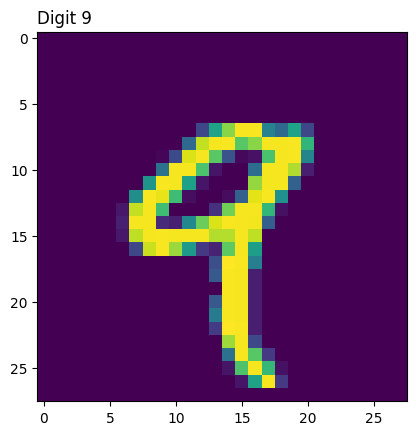

In [14]:
digit = train_images[4]
plt.imshow(digit)
plt.title(f'Digit {str(int(train_labels[4]))}', loc='left')
plt.show()

## Slicing

In [17]:
train_images[10: 100].shape

(90, 28, 28)

In [19]:
train_images[:, 14:, 14:].shape

(60000, 14, 14)

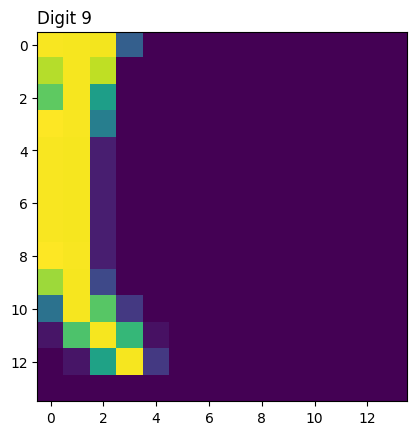

In [20]:
digit = train_images[4, 14:, 14:]
plt.imshow(digit)
plt.title(f'Digit {str(int(train_labels[4]))}', loc='left')
plt.show()

In [22]:
train_images[:, 7:-7, 7:-7].shape

(60000, 14, 14)

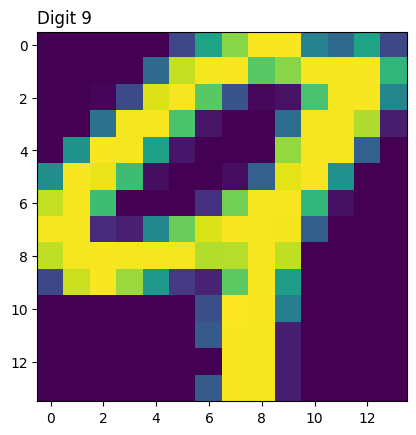

In [23]:
digit = train_images[4, 7:-7, 7:-7]
plt.imshow(digit)
plt.title(f'Digit {str(int(train_labels[4]))}', loc='left')
plt.show()

# Preprocessing

In [3]:
train_images_prep = train_images.reshape((60_000, 28 * 28))
train_images_prep = train_images_prep.astype('float32') / 255

test_images_prep = test_images.reshape((10_000, 28 * 28))
test_images_prep = test_images_prep.astype('float32') / 255

In [23]:
train_images[0].shape

(28, 28)

In [22]:
train_images_prep[0].shape

(784,)

In [24]:
train_images_prep.shape

(60000, 784)

# Neural Network

In [4]:
# Model architecture
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
# Model optimization
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy']
)

2025-05-04 20:58:25.701539: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Train
model.fit(train_images_prep, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - Accuracy: 0.8735 - loss: 0.4370
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Accuracy: 0.9670 - loss: 0.1151
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Accuracy: 0.9787 - loss: 0.0718
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - Accuracy: 0.9848 - loss: 0.0502
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Accuracy: 0.9892 - loss: 0.0362


In [25]:
test_digits = test_images_prep[:10]

In [26]:
test_digits

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
predictions = model.predict(test_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [31]:
predictions[0].argmax()

np.int64(7)

In [33]:
predictions[0][7]

np.float32(0.9997366)

In [35]:
test_labels[0]

np.uint8(7)

In [9]:
test_loss, test_acc = model.evaluate(test_images_prep, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.9767 - loss: 0.0774  


In [10]:
test_loss

0.06507965177297592

In [11]:
test_acc

0.98089998960495

# Data Representation

## Scalars (rank-0 tensors)

In [13]:
np.array(7).ndim

0

In [32]:
np.array(7).shape

()

## Vectors (rank-1 tensors)

In [33]:
# 1 dimensional tensor
print(np.array([1, 2, 3, 4, 5, 6, 7]).ndim)

# 7 dimensional vector
np.array([1, 2, 3, 4, 5, 6, 7]).shape

1


(7,)

## Metrices (rank-2 tensors)

    (sample, features)

In [28]:
# Column/ row data
# Matrix
np.array([[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]]).ndim

2

In [34]:
np.array([[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]]).shape

(3, 5)

## Rank-3 and higher-rank tensors

    (sample, timesteps, features)

In [31]:
# Data cube
# Multidimensional data
np.array([[[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]],
          
         [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]],
         
         [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]]]).ndim

3

In [35]:
np.array([[[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]],
          
         [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]],
         
         [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]]]).shape

(3, 3, 5)

In [36]:
np.array([[[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]],
          
         [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]]]).shape

(2, 3, 5)

### Rank-4

    images
    (samples, height, width, channels)

### Rank-5 

    video
    (samples, frames, height, witdh, channels)

## Notation

Axis 0: Sample data

    batch axis

In [25]:
train_images[:128].shape

(128, 28, 28)

# Tensor Operation

## Relu

    relu(dot(input, w) b)

    A dot product between the input tensor and a tensor named w (weight)

    An addition (+) between the resulting matrix and a vector b (bias)

    A relu operation: relu(x) ix max(x, 0) (retified linear unit)

In [30]:
print(tf.nn.relu(np.array(10 * 2 + 1)))

tf.Tensor(21, shape=(), dtype=int64)


In [31]:
print(tf.nn.relu(np.array(-10 * 2 + 1)))

tf.Tensor(0, shape=(), dtype=int64)


In [51]:
print(tf.nn.relu(np.array(np.dot(-10, 2) + 1)))

tf.Tensor(0, shape=(), dtype=int64)


## Element wise

     Applied independently to each entry in the tensors

     Pro parallel implementation (vectorized implementations)

     Don by BLAS (Basic Linear Algebra Subprograms)

         Fortran
         C

## Broadcasting

    Math the smaller tensor to the shape of larger

In [42]:
# Arrays with different dimensions
X = np.random.random((32, 10))
y = np.random.random((10,))

In [35]:
X.shape

(32, 10)

In [36]:
y.shape

(10,)

In [37]:
X.ndim

2

In [38]:
y.ndim

1

In [43]:
# Add dimension
y = np.expand_dims(y, axis=0)
y.ndim

2

In [44]:
y.shape

(1, 10)

In [47]:
[y] * 32

[array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54

In [49]:
Y = np.concatenate([y] * 32, axis=0)

In [50]:
Y.shape

(32, 10)

## Tensor product

    dot

    The operation over two vectors will be the sum of the multiplication of element by element axis

    Vectors: z += x[i] * y[i]

    Matrix:  z[i] += x[i, j] * y[j]

In [54]:
X[0, 0]

np.float64(0.40426019629830323)

# TensorFlow

## Constant

In [2]:
tf.ones(shape=(2, 1))

2025-06-20 21:32:10.768929: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [6]:
np.zeros([2, 1])

array([[0.],
       [0.]])

In [4]:
tf.zeros(shape=(2, 1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [7]:
np.ones([2, 1])

array([[1.],
       [1.]])

## Random

In [12]:
tf.random.normal(shape=(3, 1), mean=0, stddev=1)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.4566752],
       [ 1.2208523],
       [-1.8936332]], dtype=float32)>

In [22]:
np.random.normal(size=[3, 1])

array([[0.06922994],
       [0.73551397],
       [0.17104595]])

In [14]:
tf.random.uniform(shape=(3, 1), minval=1)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

## Assignment

In [23]:
x = np.ones(shape=[2, 2])

In [24]:
x

array([[1., 1.],
       [1., 1.]])

In [26]:
x[0, 0] = 0

In [27]:
x

array([[0., 1.],
       [1., 1.]])

In [28]:
x = tf.ones(shape=(2, 2))
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [30]:
# Tensor aren't assigned
x[0, 0] = 0

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

## Variable

In [3]:
var = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))

In [4]:
var

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.5026562 ],
       [-0.44870234],
       [-0.45459616]], dtype=float32)>

In [6]:
var.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
var

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
var[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
var.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

## Operations

In [11]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [12]:
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [13]:
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [14]:
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [15]:
d

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [16]:
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

## GradientTape

In [18]:
input_var = tf.Variable(initial_value=3.)
input_var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [19]:
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [20]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

In [21]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [26]:
time = tf.Variable(0.)

with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [23]:
position

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [25]:
speed

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [27]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.800000190734863>

## Linear Classifier

In [40]:
num_samples_per_class = 1_000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

In [43]:
print(np.max(negative_samples))
print(np.min(negative_samples))

6.721962009995892
-3.058678444514459


In [44]:
print(np.max(positive_samples))
print(np.min(positive_samples))

6.277588337069176
-2.72424634446662


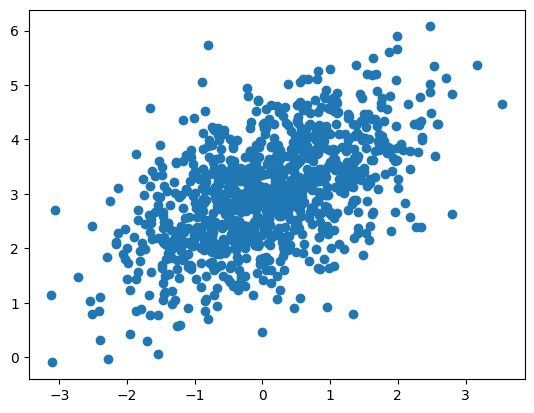

In [39]:
plt.scatter(negative_samples[:, 0], negative_samples[:, 1])

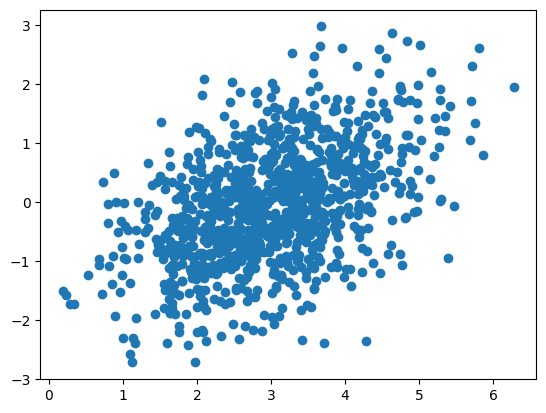

In [41]:
plt.scatter(positive_samples[:, 0], positive_samples[:, 1])

In [45]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [47]:
inputs.shape

(2000, 2)

In [51]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

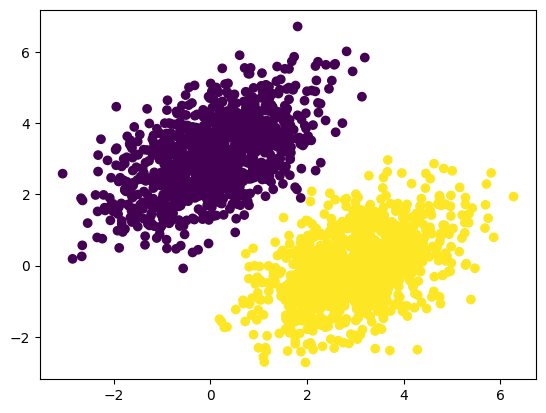

In [52]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

In [53]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [54]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.45946848],
       [0.41438425]], dtype=float32)>

In [55]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [61]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [57]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [67]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
        grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
        W.assign_sub(grad_loss_wrt_W * learning_rate)
        b.assign_sub(grad_loss_wrt_b * learning_rage)

        return loss

In [68]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 0.1596
Loss at step 1: 0.0869
Loss at step 2: 0.0724
Loss at step 3: 0.0668
Loss at step 4: 0.0629
Loss at step 5: 0.0595
Loss at step 6: 0.0564
Loss at step 7: 0.0536
Loss at step 8: 0.0511
Loss at step 9: 0.0487
Loss at step 10: 0.0466
Loss at step 11: 0.0447
Loss at step 12: 0.0429
Loss at step 13: 0.0413
Loss at step 14: 0.0399
Loss at step 15: 0.0386
Loss at step 16: 0.0374
Loss at step 17: 0.0363
Loss at step 18: 0.0352
Loss at step 19: 0.0343
Loss at step 20: 0.0335
Loss at step 21: 0.0327
Loss at step 22: 0.0321
Loss at step 23: 0.0314
Loss at step 24: 0.0309
Loss at step 25: 0.0303
Loss at step 26: 0.0299
Loss at step 27: 0.0294
Loss at step 28: 0.0290
Loss at step 29: 0.0287
Loss at step 30: 0.0283
Loss at step 31: 0.0280
Loss at step 32: 0.0278
Loss at step 33: 0.0275
Loss at step 34: 0.0273
Loss at step 35: 0.0271
Loss at step 36: 0.0269
Loss at step 37: 0.0267
Loss at step 38: 0.0266
Loss at step 39: 0.0264


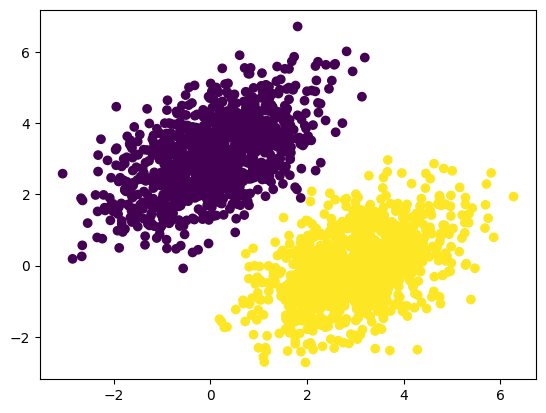

In [69]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)